In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import random 

In [4]:
def Model3_Simulation(q, p1, p2, p3, TERM):
    TNOW=0
    Q1=0
    Q2=0 
    Q3=0
    TOTAL_CUST = 0 
    

    TOTAL_Queue_v = []
    Average_Total_Queue_v= []

    AQ1 = 0
    AQ2 = 0
    AQ3 = 0 
    ATotal_Q = 0 
    
     

    TIME_v = []
    iter = 0
    r = 1-q
    
    # Initialise number of arrivals and matches of each type to be 0 
    Matches_1 = 0 
    Matches_2 = 0 
    Matches_3 = 0 
    
    Arrivals_1 = 0 
    Arrivals_2 = 0 
    Arrivals_3 = 0 
    
    # Initialise vectors to keep track of matches 

# Simulation 
    while TNOW < TERM:
        # Increase time by 1
        TNOW += 1 
        iter += 1
        #print('Iteration')
        #print(iter)
        #plt.plot(TNOW, Q3, color='blue')
        #print('TNOW')
        #print(TNOW)
        # Update Area Statistics 
        AQ1 += Q1
        AQ2 += Q2
        AQ3 += Q3
        ATotal_Q += Q1+Q2+Q3
        #print('Q1')
       # print(Q1)
        #print(AQ1)
        #print('Q2')
        #print(Q2)
        #print(AQ2)
        #print('Q3')
        #print(Q3)
        #print(AQ3)
        
        #AVQ_v = np.append(AVQ_v,((Q1+Q2+Q3)/TNOW))
       # AQ1_v = np.append(AQ1_v, AQ1)
        #AQ2_v = np.append(AQ2_v, AQ2)
        #AQ3_v = np.append(AQ3_v, AQ3)
       # AVQ_v = np.append(AVQ_v, AVQ)
        TIME_v = np.append(TIME_v, TNOW)


        # Generate U1 to check for arrival of class 1
        u1 = np.random.uniform(0,1)
        # if u1 < p then there is an arrival of type 1, update Q1 and n1
        if(u1 < p1):
            Q1 += 1
            n1 = 1
            Arrivals_1 += 1
            #print('Class 1 arrival')
        #otherwise no arrival, n1 = 0 and do not update Q1 
        else: 
            n1 = 0 
            #print('No class 1 arrival')


        u2 = np.random.uniform(0,1)
        # if u2 < p2 then there is an arrival of type 2, update Q2 and n2
        if(u2 < p2):
            Q2 += 1
            n2 = 1
            Arrivals_2 += 1 
           # print('Class 2 arrival')
        #otherwise no arrival, n2 = 0 and do not update Q2
        else: 
            n2 = 0
           # print('No class 1 arrival')


        u3 = np.random.uniform(0,1)
        # if u3 < p3 then there is an arrival of type 3, update Q3 and n3
        if(u3 < p3):
            Q3 += 1
            n3 = 1
            Arrivals_3 += 1
           # print('Class 3 arrival')
        #otherwise no arrival, n3 = 0 and do not update Q3
        else: 
            n3 = 0 
            #print('No class 3 arrival')



        # Classes take order of priority 1 > 2 > 3
        # If there is a customer in Q1, start by checking matches for the new arrival in Q1 
        if (Q1 > 0 and n1 > 0):
           # print('Checking Q1 first')
            # they first attempt to match with a customer of class 2 (if Q2 is not empty)
            if(Q2 > 0 and n1 > 0):
                # Generate a random variable for checking Q2
                u = np.random.uniform(0,1)
                # If u < probability of having at least one match with Q2
                if(u < (1-r**(Q2))):
                    
                    # Increase matches of 1 and 2 by 1 
                    Matches_1 += 1 
                    Matches_2 += 1
                    #there is a match with Q2, since they are all identical, pick which Q2 to match with 
                    # Generate u to do this 
                    
                    
                    u = np.random.uniform(0,1)
                    # If u > (q2-1)/q2 Q1 matches with Q2s new arrival, 
                    if(u > ((Q2-1)/Q2)):
                      #  print('new Q1 matches with Q2 new arrival')
                    # Q1 and Q2 reduce by 1
                        Q1 -= 1
                        Q2 -= 1
                        # n1 and n2 reduce by 1 to show the new arrivals matched 
                        n1 -= 1 
                        n2 -= 1 
                        
        

                    # Else it matches with a different Q2 
                    else:
                       # print('new Q1 matches with Q2')
                        Q1 -= 1
                        Q2 -= 1
                        n1 -= 1
               

            # next attempt to match with a customer of class 3 if Q3 > 0
            if(Q3 > 0 and n1 > 0):
                # Generate a random variable for checking Q3
                u = np.random.uniform(0,1)
                # If u < probability of having at least one match with Q3
                if(u < (1-r**(Q3))):
                    #there is a match with Q3, since they are all identical, pick which Q3 to match with 
                    # Generate u to do this 
                    
                    # Increase 1 and 3 matches by 1
                    Matches_1 += 1
                    Matches_3 += 1 
                    u = np.random.uniform(0,1)
                    # If u > (q3-1)/q3 Q1 matches with Q3s new arrival, 
                    if(u > ((Q3-1)/Q3)):
                     #   print('New q1 matches with q3 arrival')
                    # Q1 and Q3 reduce by 1
                        Q1 -= 1
                        Q3 -= 1
                        # n1 and n3 reduce by 1 to show the new arrivals matched 
                        n1 -= 1 
                        n3 -= 1 

                    # Else it matches with a different Q3
                    else:
                      #  print('new Q1 matches with Q3 arrival')
                        Q1 -= 1
                        Q3 -= 1
                        n1 -= 1
              
        # Next checking matches for the new arrival in Q2, if it has not already matched with Q1
        if (Q2 > 0 and n2 > 0):
           # print('Now checking Q2')
            # they first attempt to match with a customer of class 1 (if Q1 is not empty)
            if(Q1 > 0 and n2 > 0):
                #print('Now checking Q2')
                # Generate a random variable for checking Q1
                u = np.random.uniform(0,1)
                # If u < probability of having at least one match with Q1
                if(u < (1-r**(Q1))):
                  #  print('New q2 matches with q1')
                    #there is a match with Q1, doesnt matter whether it is new arrival that matches or not since Q1 new arrival has already been checked
                    Q1 -= 1
                    Q2 -= 1
                    n2 -= 1 
                    
                    # Increase matches of 1 and 2 by 1 
                        
                    Matches_1 += 1 
                    Matches_2 += 1
                
            # next attempt to match with a customer of class 3 if Q3 > 0
            if(Q3 > 0 and n2 > 0):
                #print('Now checking Q2')
                # Generate a random variable for checking Q3
                u = np.random.uniform(0,1)
                # If u < probability of having at least one match with Q3
                if(u < (1-r**(Q3))):
                    #there is a match with Q3, since they are all identical, pick which Q3 to match with 
                    # Generate u to do this 
                    
                    # Increase matches of 1 and 2 by 1 
                    Matches_2 += 1 
                    Matches_3 += 1
                    
                    u = np.random.uniform(0,1)
                    # If u > (q3-1)/q3 Q2 matches with Q3s new arrival, 
                    if(u > ((Q3-1)/Q3)):
                     #   print('New q2 matches with q3 arrival')
                    # Q2 and Q3 reduce by 1
                        Q2 -= 1
                        Q3 -= 1
                        # n2 and n3 reduce by 1 to show the new arrivals matched 
                        n2 -= 1 
                        n3 -= 1 

                    # Else it matches with a different Q3
                    else:
                       # print('New q2 matches with q3')
                        Q2 -= 1
                        Q3 -= 1
                        n1 -= 1
                

        # Next checking matches for the new arrival in Q3, if it has not already matched with Q1 or Q2
        if (Q3 > 0 and n3 > 0):
           # print('Now checking Q3')
            # they first attempt to match with a customer of class 1 (if Q1 is not empty)
            if(Q1 > 0 and n3 > 0):
                #print('Now checking Q3')
                # Generate a random variable for checking Q1
                u = np.random.uniform(0,1)
                # If u < probability of having at least one match with Q1
                if(u < (1-r**(Q1))):
                  #  print('New q3 matches with q1')
                    #there is a match with Q1, doesnt matter whether it is new arrival that matches or not since Q1 new arrival has already been checked
                    Q1 -= 1
                    Q3 -= 1
                    n3 -= 1 
                    
                    # Increase matches of 1 and 2 by 1 
                        
                    Matches_1 += 1 
                    Matches_3 += 1
                
            if(Q2 > 0 and n3 > 0):
               # print('Now checking Q3')
                # Generate a random variable for checking Q2
                u = np.random.uniform(0,1)
                # If u < probability of having at least one match with Q2
                if(u < (1-r**(Q2))):
                 #   print('New q3 matches with q2')
                    #there is a match with Q2, doesnt matter whether it is new arrival that matches or not since Q2 new arrival has already been checked
                    Q2 -= 1
                    Q3 -= 1
                    n3 -= 1 
                    
                    # Increase matches of 1 and 2 by 1 
                        
                    Matches_2 += 1 
                    Matches_3 += 1
                    
     
        TOTAL_Queue_v = np.append(TOTAL_Queue_v, (Q1+Q2+Q3))
        Average_Total_Queue_v = np.append(Average_Total_Queue_v, (ATotal_Q/TNOW))
        
    Match_Rate_1 = Matches_1 / Arrivals_1
    Match_Rate_2 = Matches_2 / Arrivals_2
    Match_Rate_3 = Matches_3 / Arrivals_3
    
    Total_Match_Rate = (Matches_1 + Matches_2 + Matches_3)/(Arrivals_1 + Arrivals_2 + Arrivals_3)
    
    Av_Q1 = AQ1/TERM
   
    Av_Q2 = AQ2/TERM
    
    Av_Q3 = AQ2/TERM


    return TIME_v, TOTAL_Queue_v, Average_Total_Queue_v, Match_Rate_1, Match_Rate_2, Match_Rate_3, Total_Match_Rate, Av_Q1, Av_Q2, Av_Q3




In [78]:

results_048 = discrete_simulation(0.0001, 1, 1, 1, 100000)


<function matplotlib.pyplot.show(close=None, block=None)>

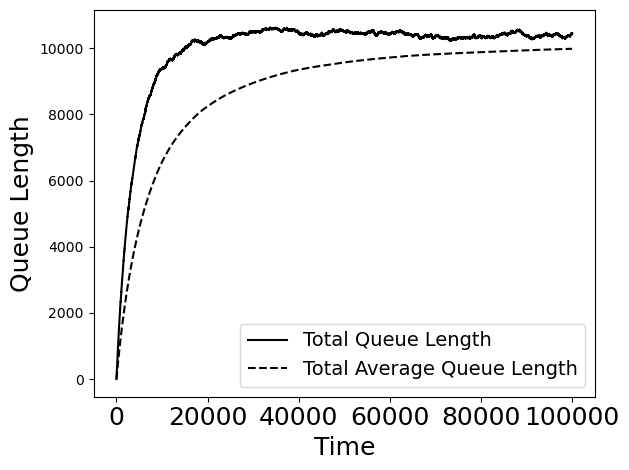

In [79]:
plt.xlabel('Time', fontsize=18)
plt.ylabel('Queue Length', fontsize=18)
plt.plot(results_048[0], results_048[1], linestyle='solid', color='black', label='Total Queue Length')
plt.plot(results_048[0], results_048[2], linestyle='dashed', color='black', label='Total Average Queue Length')
plt.xticks(fontsize=18)
plt.xticks(fontsize=18)
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('Discrete_Stability_q=049.png')
plt.show


In [ ]:
plt.tight_layout()